# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

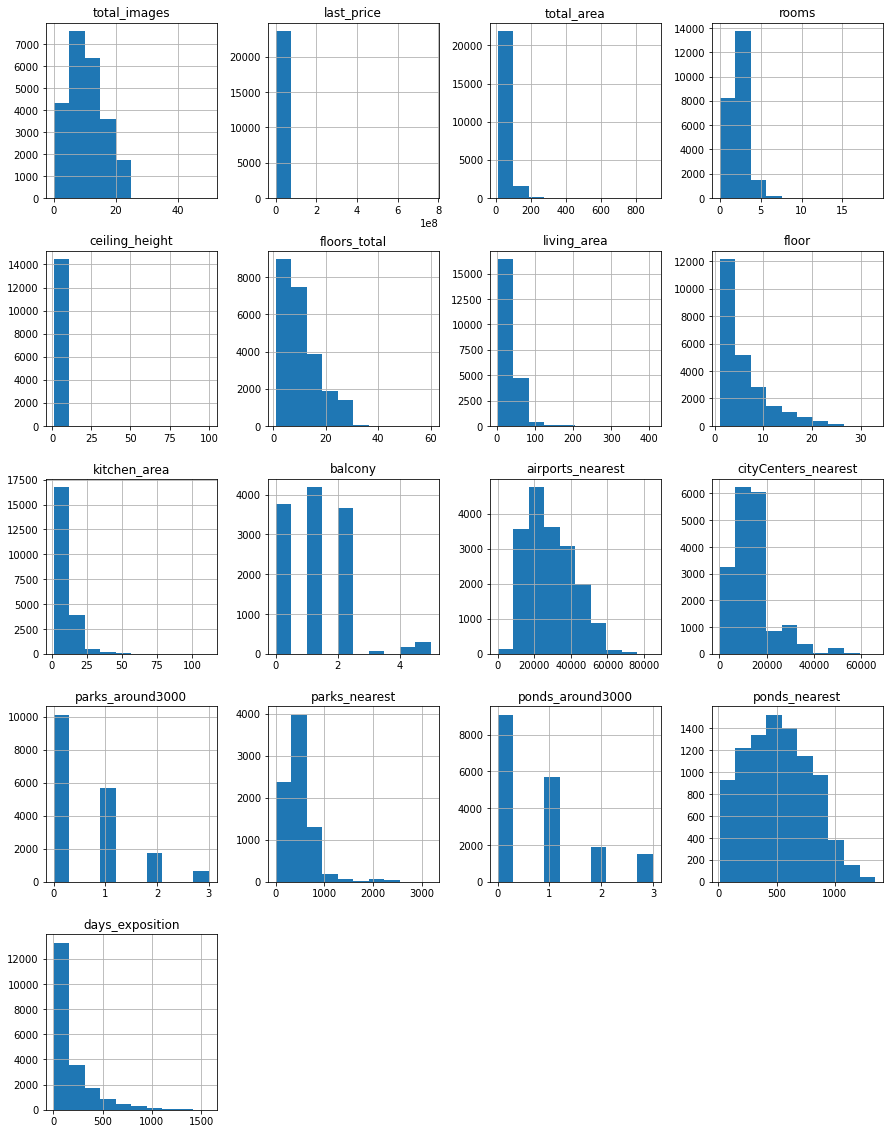

In [1]:
# при помощи библиотеки Pandas импортирую файл с данными в датафрейм Data
import pandas as pd

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

import matplotlib.pyplot as plt

# изучаю первые 5 строк датафрейма
data.head()

# смотрю общие данные по датафрейму
data.info()

# строю общую гистограмму для всех числовых столбцов таблицы
data.hist(figsize=(15, 20))

Задача проекта – научиться определять рыночную стоимость объектов недвижимости. Исходные данные - архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

По результатам выполнения первого блока заданий делаю следующие выводы:

I) В таблице датафрейма 23699 строк и 22 колонки

II) Далее подробнее изучим данные по каждой колонке:
1. total_images - пропусков нет, тип данных - int64. На первый взгляд все ОК.
2. last_price - пропусков нет, тип данных - float64. На первый взгляд все ОК.
3. total_area - пропусков нет, тип данных - float64. На первый взгляд все ОК.
4. first_day_exposition - пропусков нет, тип данных - object. Здесь вместо object должен быть тип данных datetime, т.к. речь идет про дату.
5. rooms - пропусков нет, тип данных - int64. На первый взгляд все ОК.
6. ceiling_height - есть пропуски, тип данных - float64.
7. floors_total  - есть пропуски, тип данных - float64. Здесь вместо float64 должен быть тип данных int, т.к. число этажей - это всегда целое значение.
8. living_area - есть пропуски, тип данных - float64.
9. floor - пропусков нет, тип данных - int64. На первый взгляд все ОК.
10. is_apartment - есть пропуски, тип данных - object. Здесь вместо object должен быть тип данных bool, т.к. возможны только 2 категории ответа здесь.
11. studio - пропусков нет, тип данных - bool. На первый взгляд все ОК.
12. open_plan - пропусков нет, тип данных - bool. На первый взгляд все ОК.
13. kitchen_area - есть пропуски, тип данных - float64.
14. balcony - есть пропуски, тип данных - float64. Здесь вместо float64 должен быть тип данных int, т.к. число балконов - это всегда целое значение.
15. locality_name - есть пропуски, тип данных - object.
16. airports_nearest - есть пропуски, тип данных - float64.
17. cityCenters_nearest - есть пропуски, тип данных - float64.
18. parks_around3000 - есть пропуски, тип данных - float64. Здесь вместо float64 должен быть тип данных int, т.к. число парков - это всегда целое значение.
19. parks_nearest - есть пропуски, тип данных - float64.
20. ponds_around3000 - есть пропуски, тип данных - float64. Здесь вместо float64 должен быть тип данных int, т.к. число водоемов - это всегда целое значение.
21. ponds_nearest - есть пропуски, тип данных - float64.
22. days_exposition - есть пропуски, тип данных - float64. Здесь вместо float64 должен быть тип данных int, т.к. число дней - это всегда целое значение.

III) Наблюдения по 17 гистограммам:
1. total_images. Число фотографий в объявлениях квартиры - 0-25 штук. Обычно их 5 или 10 штук. Реже, но тоже часто - 0 или 20 фото. Еще реже - 25 фотографий.
2. last_price. Цена на момент снятия с публикации во всех случаях - 1. Судя по тем цифрам, что я вижу в первых 5 строках таблицы, речь идет про миллионы. Т.е. в данном случае гистограмма из-за некорректной настройки шкалы делений по оси X не дает полезной информации.
3. total_area. Общая площадь квартиры в квадратных метрах - примерно в 90% случаев представлены квартиры меньше 100 м2. Почти все оставшиеся случаи - квартиры от 100 до 200 м2. Есть еще варианты площадью от 200 до 300 м2, но их число в рамках погрешности.
4. rooms. Примерно половина случаев - квартиры с 3-4 комнатами. Почти в раза меньше в базе 1-2 комнатных квартир. Примерно 10% предложений - 5-6 комнатные. 7-8 комнатные тоже есть, но их количество в рамках погрешности.
5. ceiling_height. Высота потолков во всех случаях в пределах 10 метров. Гистограмма с промежутком 0-100 и шагом 10 по шкале X в данном случае неинформативна. Лучше было бы сделать промежуток 0-5 метров и те же 10 корзин, чтобы была видны объемы групп через каждые 0,5 метра изменения высоты потолка. А еще лучше было бы начать с высоты потолка 2 метра, а не с нуля, т.к. меньше 2 метров высотой квартир быть не должно в принципе.
6. floors_total. По числу этажей в доме чаще всего представлены объявления 5 и 10-этажных домов (таких объявлений примерно 2/3 от общего числа). Половину из оставшихся составляют дома в 15-18 этажей. Оставшиеся варианты - 20, 30 этажей, а также 30-35, но число таких в рамках погрешности.
7. living_area. Чаще всего жилая площадь в объявлении - в пределах 40 м2 (примерно 3/4 случаев). Почти все оставшиеся варианты имеют жилую площадь в пределах 40-80 м2. Есть еще варианты 80-120 м2, но их ничтожно мало.
8. floor. Примерно половина предложений - 1-4 этажи. Четверть - 5-8 этажи. Половина из оставшихся - 9-12 этажи. Далее по мере увеличения этажа в объявлении вариантов становится все меньше. Больше 25 этажей объявлений практически нет.
9. kitchen_area. Чаще всего площадь кухни в объявлении - в пределах 12 м2 (примерно 3/4 случаев). Почти все оставшиеся варианты кухонь имеют площадь в пределах 12-25 м2. Есть еще варианты больше 25 м2, но их ничтожно мало.
10. balcony. По числу балконов примерно равные доли имеют следующие варианты: 0, 1 или 2 балкона в квартире. Число предложений с 3 балконами ничтожно мало. Есть варианты квартир с 4 балконами, хоть их и немного. А вот дальше необычно: если до этого на гистограмме между 0, 1, 2 и 3 были пробелы, позволявшие удобно рассматривать отдельные столбцы, то после 4 впритык к этому столбцу идет еще один. Судя по цене деления речь про квартиры с 4,5 балконами, чего в природе быть не должно. Видимо, в данных по этой категории квартир есть ошибка.
11. airports_nearest. Рядом с аэропортом почти никто не живет, это логично. Далее по числу вариантов идут: 20 км до аэропорта, 10 или 30 км (одинаковое число вариантов), потом заметно меньше 40 км, еще меньше - 50 и почти нет вариантов 60+ км. Последнее тоже логично, т.к. от аэропорта до города обычно 10-20 км. Если квартира находится на другом конце города, то это еще несколько десятков километров, а потом уже начинается редкий частный сектор и поля, где вариантов жилья немного.
12. cityCenters_nearest. Чаще всего квартиры находятся в 10-20 км от центра города (примерно 70% случаев). Половина из оставшихся - в центре. Остальные - дальше 20 км, причем дальше 40 км вариантов почти нет. Все это тоже логично: львиная доля людей живет в спальных районах по периметру центра города, их площадь, а, значит, и число квартир, обычно больше, чем аналогичные показатели центра. Да и этажность в спальных районах обычно выше, чем в центре, где меньше свободной площади под застройку и строже ограничения по стройке. Ну а в какой-то момент город просто заканчивается, в нашем случае это 30-40 км от центра.
13. parks_around3000. Примерно в половине случаев парков в радиусе 3 км нет. В 2 случаях из 3 оставшихся такой парк есть, но в единственном числе. В 10% случаев квартира находится в 3 км близости сразу к 2 паркам. Ну и совсем небольшое кол-во квартир расположены близко к паркам одновременно.
14. parks_nearest. Судя по гистограмме 95% квартир, у которых указаны данные по наличию парка, находятся менее чем в 1000 метров от ближайшего парка.
15. ponds_around3000. Примерно в половине случаев прудов в радиусе 3 км нет. В 2 случаях из 3 оставшихся пруд есть, но в единственном числе. В оставшихся случаях квартира находится в 3 км близости сразу к 2 или 3 прудам. Эти данные коррелируют с данными гистограммы по числу парков в радиусе 3 км, т.к. часто в городских парках есть озера, и не одно, а вот просто озера без парков в городе встречаются редко.
16. ponds_nearest. Судя по гистограмме 95% квартир, у которых указаны данные по наличию озера, находятся менее чем в 1000 метров от ближайшего озера.
17. days_exposition. Примерно в 60% случаев объявления провисели с момента публикации до снятия меньше 150 дней. В половине из оставшихся случаев они провисели 150-300 дней. Остальные объявления висели дольше, но примерно 2/3 объявлений были сняты каждые следующие 150 дней. В течение еще 150 дней снимались еще примерно 2/3 из оставшихся ранее объявлений и так вплоть до почти полного снятия всех объявлений спустя 1200-1500 дней.

### Предобработка данных

Чтобы корректно работать с данными датафрейма, нужно сделать следующее:

1. Провести работу с пропущенными данными в колонках, где есть пропуски.
2. Привести тип данных в некоторых колонках к нужному.

In [2]:
# посчитаем пропуски
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [3]:
# разберемся, что делать с пропусками в каждом конкретном случае
# для начала удалим строки, в которых есть пропуски в колонках floors_total и locality_name
# их мало, заполнить пропуски корректно нельзя, поэтому от таких данных можно избавиться, это не повлияет на точность расчетов в дальнейшем
data = data.dropna(subset=['floors_total', 'locality_name'])

# проверяем результат
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                 11475
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [4]:
# заменим типы данных в некоторых колонках датафрейма на корректные, а также заполним пропуски в некоторых колонках

# first_day_exposition переводим в тип данных datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# floors_total переводим в тип данных int
data['floors_total'] = data['floors_total'].astype('int')

# is_apartment переводим в тип данных bool
data['is_apartment'] = data['is_apartment'].astype('bool')

# balcony переводим в тип данных int, меняем пропуски на 0, т.к., судя по всему, балконов в таких случаях нет
data['balcony'] = data['balcony'].fillna(value=0).astype('int')

# parks_around3000 переводим в тип данных int, меняем пропуски на 0, т.к., судя по всему, парков рядом в таких случаях нет
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype('int')

# ponds_around3000 переводим в тип данных int, меняем пропуски на 0, т.к., судя по всему, прудов рядом в таких случаях нет
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype('int')

# days_exposition переводим в тип данных int, пропуски меняем на 0, чтобы при будущем анализе они легко вставали в одну группу
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

# проверяем результат
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition             0
dtype: int64

In [5]:
# по результатам проверки ревьюера выяснилось, что заменять пропуски медианой по жилой площади, площади кухни и высоте потолков в случае с нашей выборкой неверно, поэтому оставляю в них пропуски

# проверяем результат
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition             0
dtype: int64

В итоге с пропусками остаются такие графы датафрейма:
- airports_nearest
- cityCenters_nearest
- parks_nearest
- ponds_nearest
- ceiling_height
- living_area
- kitchen_area

Пустые данные в этих графах не заполнить корректно медианными значениями, поэтому решил их не трогать вообще.

Возможные причины пропусков данных в таблице датафрейма:
1. floors_total  и locality_name - пропусков очень мало, скорее всего, причина в человеческом факторе.
2. balcony, parks_around3000, ponds_around3000 - пропусков много, но причина, скорее всего, в том, что у данных объектов нет искомого признака, т.е. балкона, парка или озера рядом. Соответственно, стоит пропуск, который я заменил на 0.
3. is_apartment - тут варианта ответа 2: либо да, либо нет, поэтому пропуски можно считать за "нет", что и сделал Python при замене типа данных в этой графе на bool.
4. days_exposition - видимо, эти объявления действующие, поэтому для них не заполнены данные. Я заменил пропуски здесь на 0, чтобы в будущем их проще анализировать.
5. ceiling_height, living_area, kitchen_area - это очень важные данные, да и пропусков по ним много, поэтому мне сложно представить, что они не заполнены по человеческой вине. Возможно, дело в работе программы по сбору данных.
6. airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest - здесь очень много пропусков, и все это данные о расстоянии до того или иного объекта. Тут, скорее всего, человеческий фактор (эти данные просто не обязательны к заполнению для публикации объявления).

Причины замены типов данных в некоторых графах таблицы датафрейма:
1. Для проведения корректных вычислений важно, чтобы исходные данные имели корректный тип (в нашем случае - int).
2. Даты удобнее анализировать, когда они имеют тип данных datetime.
3. Графы, где ответом на вопрос может быть только "да" или "нет", лучше заполнять типом данных bool.

Теперь рассмотрим аномалии данных в датафрейме. Выведем общую информацию по графам методом .describe()

In [6]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,14481.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,23565.000000,8030.000000,23565.000000,9036.000000,23565.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.771283,10.675875,34.454822,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.468831,490.580448,0.589900,518.289509,156.420115
std,5.681156,1.091093e+07,35.657060,1.078591,1.261983,6.594823,22.045359,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.748403,341.572956,0.883966,278.009558,213.517293
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,22.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,0.000000,503.000000,73.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,198.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Видно, что в анализ не попало 5 граф, но это не страшно, т.к.:
1. first_day_exposition - дата публикации вряд ли на что-то влияет на данный момент, да и массив уникальных значений будет огромный, не думаю, что на него стоит тратить время.
2. is_apartment - здесь в качестве данных булево значение, поэтому аномалий быть не может.
3. studio - аналогично.
4. open_plan - аналогично.
5. locality_name - название населенного пункта, нечисловые данные.

Теперь о графах, которые попали в анализ, прежде всего нас интересуют минимальные и максимальные значения:
- total_images - от 0 до 50 фотографий, данные нормальные, аномалий нет.
- last_price — от 12190 до 763000000 руб - здесь что минимальная цена слишком маленькая, что максимальная подозрительно большая, нужно будет глубже изучить данные по этому столбцу.
- total_area — от 12 до 900 м2 общая площадь квартиры. В первом случае, видимо, речь о комнате, в последнем - о загородном доме, вполне правдоподобно и то и другое.
- rooms — от 0 до 19 комнат. Нужно понять, 0 комнат - это когда продается комната в коммуналке? 19 комнат - это, видимо, про дом, что вполне правдоподобно.
- ceiling_height - от 1 до 100 метров высота потолка. Тут явно аномалии в результатах.
- floors_total — от 1 до 60 этажей в доме, вполне правдоподобно, если речь про одноэтажный дом и про высотки, которые в СПб есть.
- living_area — от 2 до 409,7 м2 жилая площадь. Здесь явно аномалии в результатах MIN.
- floor — от 1 до 33 этаж квартиры, данные нормальные, аномалий нет.
- kitchen_area — от 1,3 до 112 м2 площадь кухни. Тут явно аномалии в результатах.
- balcony — от 0 до 5 балконов, данные нормальные, аномалий нет.
- airports_nearest — от 0 до 84869 м расстояние до ближайшего аэропорта. Вряд ли кто-то продает квартиру или дом на территории аэропорта, поэтому MIN нужно проверить.
- cityCenters_nearest — от 181 до 65968 м расстояние до центра города, данные нормальные, аномалий нет.
- parks_around3000 — от 0 до 3 число парков в радиусе 3 км, данные нормальные, аномалий нет.
- parks_nearest — от 1 до 3190 м расстояние до ближайшего парка, данные нормальные, аномалий нет.
- ponds_around3000 — от 0 до 3 число водоемов в радиусе 3 км, данные нормальные, аномалий нет.
- ponds_nearest - от 13 до 1344 м расстояние до ближайшего водоема, данные нормальные, аномалий нет.
- days_exposition — от 0 до 1580 дней было размещено объявление, данные нормальные, аномалий нет.

In [7]:
# оценим 10 самых больших результатов по графе last_price:
data['last_price'].sort_values(ascending=False).head(10)

12971    763000000.0
19540    420000000.0
14706    401300000.0
1436     330000000.0
15651    300000000.0
22831    289238400.0
16461    245000000.0
13749    240000000.0
5893     230000000.0
8900     190870000.0
Name: last_price, dtype: float64

In [8]:
# выведем данные по самому дорогому объекту
data.loc[12971]

total_images                             19
last_price                      763000000.0
total_area                            400.0
first_day_exposition    2017-09-30 00:00:00
rooms                                     7
ceiling_height                          NaN
floors_total                             10
living_area                           250.0
floor                                    10
is_apartment                           True
studio                                False
open_plan                             False
kitchen_area                            NaN
balcony                                   2
locality_name               Санкт-Петербург
airports_nearest                    25108.0
cityCenters_nearest                  3956.0
parks_around3000                          1
parks_nearest                         530.0
ponds_around3000                          3
ponds_nearest                         756.0
days_exposition                          33
Name: 12971, dtype: object

400 квадратных метров, 7 комнат, СПб, все равно 763 млн рублей - это подозрительно дорого. Чисто теоретически тут могли прибавить лишний ноль нечаянно, и тогда стоимость была бы 76,3 млн рублей, что больше похоже на правду.  Посмотрим, сколько всего объектов, которые стоят дороже 100 млн рублей.

In [9]:
# выведем данные по второму по дороговизне объекту
data.loc[19540]

total_images                              8
last_price                      420000000.0
total_area                            900.0
first_day_exposition    2017-12-06 00:00:00
rooms                                    12
ceiling_height                          2.8
floors_total                             25
living_area                           409.7
floor                                    25
is_apartment                           True
studio                                False
open_plan                             False
kitchen_area                          112.0
balcony                                   0
locality_name               Санкт-Петербург
airports_nearest                    30706.0
cityCenters_nearest                  7877.0
parks_around3000                          0
parks_nearest                           NaN
ponds_around3000                          2
ponds_nearest                         318.0
days_exposition                         106
Name: 19540, dtype: object

900 квадратных метров, 12 комнат, СПб, все равно 420 млн рублей - это больше похоже на правду, хотя все равно очень дорого.

In [10]:
# выведем данные по третьему по дороговизне объекту
data.loc[14706]

total_images                             15
last_price                      401300000.0
total_area                            401.0
first_day_exposition    2016-02-20 00:00:00
rooms                                     5
ceiling_height                          NaN
floors_total                              9
living_area                           204.0
floor                                     9
is_apartment                          False
studio                                False
open_plan                             False
kitchen_area                           24.0
balcony                                   3
locality_name               Санкт-Петербург
airports_nearest                    21912.0
cityCenters_nearest                  2389.0
parks_around3000                          1
parks_nearest                         545.0
ponds_around3000                          1
ponds_nearest                         478.0
days_exposition                         393
Name: 14706, dtype: object

In [11]:
# посмотрим, сколько всего объектов в датафрейме дороже 100 млн рублей, т.к. в них, видимо, чаще всего ошибки в ценах:
len(data[data['last_price'] > 100000000])

37

Всего 37 объектов, которые, считаю возможным убрать из дальнейшего анализа данных, как потенциально искажающие верхний порог цены

401 квадратный метр, 5 комнат, СПб, все равно 401,3 млн рублей - тоже слишком дорого. Больше похоже, что тут тоже лишний ноль.

In [12]:
# оценим 10 самых маленьких результатов по графе last_price:
data['last_price'].sort_values(ascending=False).tail(10)

18867    470000.0
21912    470000.0
5698     450000.0
17676    450000.0
9581     450000.0
16219    450000.0
16274    440000.0
17456    430000.0
14911    430000.0
8793      12190.0
Name: last_price, dtype: float64

In [13]:
# выведем данные по самому дешевому объекту
data.loc[8793]

total_images                              7
last_price                          12190.0
total_area                            109.0
first_day_exposition    2019-03-20 00:00:00
rooms                                     2
ceiling_height                         2.75
floors_total                             25
living_area                            32.0
floor                                    25
is_apartment                           True
studio                                False
open_plan                             False
kitchen_area                           40.5
balcony                                   0
locality_name               Санкт-Петербург
airports_nearest                    36421.0
cityCenters_nearest                  9176.0
parks_around3000                          1
parks_nearest                         805.0
ponds_around3000                          0
ponds_nearest                           NaN
days_exposition                           8
Name: 8793, dtype: object

109 квадратных метров, 2 комнаты - тут явно опечатка в цене. Эту строку уберем.

In [14]:
# выведем данные по второму по дешевизне объекту
data.loc[14911]

total_images                                5
last_price                           430000.0
total_area                               54.0
first_day_exposition      2018-06-26 00:00:00
rooms                                       2
ceiling_height                            NaN
floors_total                                3
living_area                               NaN
floor                                       3
is_apartment                             True
studio                                  False
open_plan                               False
kitchen_area                              NaN
balcony                                     0
locality_name           посёлок станции Свирь
airports_nearest                          NaN
cityCenters_nearest                       NaN
parks_around3000                            0
parks_nearest                             NaN
ponds_around3000                            0
ponds_nearest                             NaN
days_exposition                   

54 квадрата, 2 комнаты, но это объект в посёлке станции Свирь. Чисто теоретически он может стоить таких денег.

Выводы по аномалиями графы last_price:
- 37 объектов стоят дороже 100 млн рублей, если судить по данным датафрейма, но многие из них этих денег явно не стоят. Считаю возможным исключить их из дальнейшего анализа.
- 1 объект стоит 12190 руб. Считаю возможным также исключить эту строку из дальнейшего анализа.

In [15]:
# удаляем строки, где last_price больше 100 млн рублей
data = data[data['last_price'] <= 100000000]

# удаляем строки, где last_price меньше 12200 млн рублей
data = data[data['last_price'] >= 12200]

# проверим изменения - выведем по очереди минимальные и максимальные значения в графе last_price
data['last_price'].min()
data['last_price'].max()

99000000.0

In [16]:
# контролируем, не удалилось ли что-то лишнее
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23527 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23527 non-null  int64         
 1   last_price            23527 non-null  float64       
 2   total_area            23527 non-null  float64       
 3   first_day_exposition  23527 non-null  datetime64[ns]
 4   rooms                 23527 non-null  int64         
 5   ceiling_height        14455 non-null  float64       
 6   floors_total          23527 non-null  int64         
 7   living_area           21667 non-null  float64       
 8   floor                 23527 non-null  int64         
 9   is_apartment          23527 non-null  bool          
 10  studio                23527 non-null  bool          
 11  open_plan             23527 non-null  bool          
 12  kitchen_area          21311 non-null  float64       
 13  balcony         

Следующая аномалия - ceiling_height - от 1 до 100 метров высота потолка. По СНИПУ минимальная высота потолков - 2,45 метра. Посмотрим, сколько у нас строк с высотой меньше 2,5 метров.

In [17]:
data[data['ceiling_height'] < 2.45]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
227,13,2200000.0,47.00,2018-01-12,3,2.34,5,NaN,1,True,...,NaN,0,посёлок Новый Свет,NaN,NaN,0,NaN,0,NaN,45
552,11,2999000.0,33.50,2017-03-30,1,2.00,15,17.500000,6,True,...,6.50,0,Санкт-Петербург,33972.0,11746.0,1,520.0,1,949.0,270
1322,16,6000000.0,55.00,2019-04-11,3,2.40,5,30.000000,1,False,...,15.00,0,Пушкин,14234.0,26388.0,0,NaN,0,NaN,0
1582,4,4100000.0,45.60,2016-01-13,2,2.30,9,28.400000,8,False,...,7.00,2,Санкт-Петербург,49152.0,14977.0,1,489.0,1,525.0,329
2236,2,2400000.0,63.60,2018-03-21,4,2.40,5,49.000000,2,True,...,8.00,1,Новая Ладога,NaN,NaN,0,NaN,0,NaN,45
2572,4,2400000.0,62.00,2018-12-27,3,2.00,5,40.000000,4,True,...,6.00,1,Луга,NaN,NaN,0,NaN,0,NaN,0
3633,0,5100000.0,79.40,2018-09-25,3,2.40,8,47.400000,6,False,...,14.00,5,Тосно,NaN,NaN,0,NaN,0,NaN,16
4212,1,2120000.0,35.43,2017-12-18,1,2.00,18,16.600000,9,True,...,8.80,2,Тосно,NaN,NaN,0,NaN,0,NaN,36
5498,17,2200000.0,56.00,2018-04-02,2,2.30,5,45.000000,1,True,...,9.00,2,Сясьстрой,NaN,NaN,0,NaN,0,NaN,55
5542,9,3840000.0,46.20,2018-01-09,2,2.40,9,28.500000,4,True,...,7.10,0,Санкт-Петербург,16165.0,16073.0,0,NaN,2,432.0,83


In [18]:
# посмотрим, сколько объектов имеет полотки выше 4 метров, что тоже считаю аномалией, причем, с запасом
data[data['ceiling_height'] > 4]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
154,1,8200000.0,80.0,2018-11-06,3,4.15,3,44.2,2,True,...,12.2,0,Санкт-Петербург,20562.0,3167.0,2,344.0,1,838.0,38
355,17,3600000.0,55.2,2018-07-12,2,25.00,5,32.0,2,False,...,NaN,2,Гатчина,NaN,NaN,0,NaN,0,NaN,259
464,15,66571000.0,280.3,2015-06-11,6,5.20,8,159.5,7,True,...,21.1,0,Санкт-Петербург,26316.0,6655.0,3,187.0,1,616.0,578
1053,13,550000.0,29.0,2018-02-01,1,5.00,3,NaN,1,False,...,NaN,0,Бокситогорск,NaN,NaN,0,NaN,0,NaN,6
1129,20,6695000.0,36.9,2018-09-28,1,4.06,5,22.0,2,True,...,7.2,0,Санкт-Петербург,21725.0,2990.0,1,596.0,1,866.0,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22309,20,5300000.0,45.0,2017-09-30,1,10.30,16,15.5,15,True,...,NaN,0,Санкт-Петербург,36353.0,11936.0,2,440.0,2,450.0,136
22336,19,9999000.0,92.4,2019-04-05,2,32.00,6,55.5,5,False,...,16.5,4,Санкт-Петербург,18838.0,3506.0,0,NaN,3,511.0,0
22494,7,91075000.0,491.0,2017-05-27,5,4.20,9,274.0,9,True,...,45.0,0,Санкт-Петербург,25525.0,5845.0,2,116.0,0,NaN,115
22869,0,15000000.0,25.0,2018-07-25,1,100.00,5,14.0,5,True,...,11.0,5,Санкт-Петербург,34963.0,8283.0,1,223.0,3,30.0,19


In [19]:
# получилась 71 строка, можем их также спокойно удалить

# в итоге имеем такие размеры выборок с выбросами данных по высоте потолка: 71 строка с высотой больше 4 метров и 44 строки с высотой меньше 2,45 метров

# удалим эти строки, при этом оставим на месте строки, где высота потолков не указана
data = data[((data['ceiling_height'] <= 4) & (data['ceiling_height'] >=2.45)) | (data['ceiling_height'].isna())]

In [20]:
# по очереди проверим, какие минимальные и максимальные значения высоты потолков остались в датафрейме
data['ceiling_height'].min()
data['ceiling_height'].max()

4.0

In [21]:
# контролируем, не удалилось ли что-то лишнее
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23412 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23412 non-null  int64         
 1   last_price            23412 non-null  float64       
 2   total_area            23412 non-null  float64       
 3   first_day_exposition  23412 non-null  datetime64[ns]
 4   rooms                 23412 non-null  int64         
 5   ceiling_height        14340 non-null  float64       
 6   floors_total          23412 non-null  int64         
 7   living_area           21562 non-null  float64       
 8   floor                 23412 non-null  int64         
 9   is_apartment          23412 non-null  bool          
 10  studio                23412 non-null  bool          
 11  open_plan             23412 non-null  bool          
 12  kitchen_area          21215 non-null  float64       
 13  balcony         

В итоге оставили варианты объектов с потолками от 2,45 до 4 метров. Последнее значение считаю даже завышенным, но чисто теоретически такие варианты могут быть возможны, если квартира двухэтажная, либо таунхаус имеет необычную планировку.

Следующая аномалия - living_area - от 2 до 409,7 м2 жилая площадь. По MIN значению здесь явно аномалия. Даже если речь идет о продаже комнаты, она должна быть минимум 10 метров, а по факту еще больше. Посмотрим, сколько объектов имеют площадь меньше 10 метров.

In [22]:
data[data['living_area'] < 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
114,5,4000000.0,21.40,2019-02-07,1,2.90,8,8.3,7,True,...,6.3,0,Санкт-Петербург,27089.0,5791.0,2,488.0,1,286.0,0
680,14,7200000.0,43.00,2017-10-31,1,NaN,8,9.0,2,True,...,23.0,0,Санкт-Петербург,23900.0,5232.0,1,2137.0,1,933.0,296
1326,8,8100000.0,52.00,2017-01-29,2,2.70,25,9.0,15,True,...,32.0,2,Санкт-Петербург,35555.0,15561.0,0,NaN,1,1180.0,337
2309,10,4200000.0,62.40,2017-06-15,2,2.60,9,8.4,6,True,...,41.0,2,посёлок Шушары,23662.0,29448.0,0,NaN,0,NaN,111
3242,7,4440000.0,41.00,2017-07-02,1,NaN,17,3.0,17,True,...,11.0,0,Санкт-Петербург,19272.0,13073.0,0,NaN,0,NaN,216
4100,17,5300000.0,34.80,2017-06-19,1,2.70,23,9.0,15,True,...,17.1,0,Санкт-Петербург,33626.0,13495.0,0,NaN,0,NaN,30
4542,12,3300000.0,18.00,2018-11-07,1,3.50,5,9.0,2,True,...,NaN,0,Санкт-Петербург,25157.0,4948.0,2,349.0,1,963.0,9
7312,8,3400000.0,27.00,2018-02-21,2,2.50,15,9.0,4,True,...,16.0,0,Санкт-Петербург,50246.0,16444.0,1,617.0,0,NaN,0
8325,9,4800000.0,52.00,2017-10-25,2,NaN,5,9.0,2,True,...,6.0,1,Санкт-Петербург,33358.0,13171.0,0,NaN,2,118.0,119
13915,20,6350000.0,52.00,2018-02-06,2,3.00,6,2.0,2,True,...,9.0,0,Санкт-Петербург,32453.0,6521.0,0,NaN,1,1012.0,91


In [23]:
# получилось 25 строк, можем их спокойно удалить
data = data[((data['living_area'] >= 10)) | (data['living_area'].isna())]

In [24]:
# проверим минимальное значение living_area после внесения изменений
data['living_area'].min()

10.0

In [25]:
# контролируем, не удалилось ли что-то лишнее
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23387 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23387 non-null  int64         
 1   last_price            23387 non-null  float64       
 2   total_area            23387 non-null  float64       
 3   first_day_exposition  23387 non-null  datetime64[ns]
 4   rooms                 23387 non-null  int64         
 5   ceiling_height        14323 non-null  float64       
 6   floors_total          23387 non-null  int64         
 7   living_area           21537 non-null  float64       
 8   floor                 23387 non-null  int64         
 9   is_apartment          23387 non-null  bool          
 10  studio                23387 non-null  bool          
 11  open_plan             23387 non-null  bool          
 12  kitchen_area          21193 non-null  float64       
 13  balcony         

Следующая аномалия - kitchen_area — от 1,3 до 112 м2 площадь кухни. Минимальная площадь кухни - 5-6 метров.

In [26]:
data[data['kitchen_area'] < 5]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
76,12,2800000.0,55.1,2016-05-14,3,2.60,5,38.4,1,True,...,4.9,0,Кировск,NaN,NaN,0,NaN,0,NaN,606
298,9,2650000.0,42.8,2017-04-25,2,NaN,5,30.0,3,True,...,4.5,0,Гатчина,NaN,NaN,0,NaN,0,NaN,49
422,8,1700000.0,55.2,2018-03-24,3,2.50,5,38.5,5,True,...,4.5,0,Кириши,NaN,NaN,0,NaN,0,NaN,0
906,15,2600000.0,27.0,2017-07-10,1,2.75,23,18.0,18,True,...,2.0,0,Санкт-Петербург,22131.0,17459.0,0,NaN,1,411.0,10
1327,6,2650000.0,46.2,2016-12-01,2,2.50,5,29.2,5,True,...,4.9,0,Гатчина,NaN,NaN,0,NaN,0,NaN,704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22675,9,2600000.0,42.4,2017-08-18,2,2.50,5,27.6,5,True,...,4.8,1,Гатчина,NaN,NaN,0,NaN,0,NaN,116
22839,14,3350000.0,27.0,2018-11-03,1,2.70,16,NaN,6,False,...,4.0,2,Санкт-Петербург,41935.0,9551.0,0,NaN,0,NaN,35
22849,6,2380000.0,25.0,2016-03-22,1,NaN,25,19.0,15,True,...,4.0,1,посёлок Шушары,13461.0,19247.0,0,NaN,1,351.0,140
23110,1,2900000.0,34.0,2018-02-01,2,2.90,2,20.0,1,True,...,4.0,0,посёлок Стрельна,27006.0,23832.0,0,NaN,2,872.0,196


In [27]:
# получилось 102 строки, можем их спокойно удалить

In [28]:
# посмотрим, у какого кол-ва объектов кухня больше 50 м2
data[data['kitchen_area'] > 50]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
492,18,95000000.0,216.0,2017-12-05,4,3.00,5,86.00,4,True,...,77.0,0,Санкт-Петербург,21740.0,436.0,2,138.0,3,620.0,14
1085,16,75000000.0,323.0,2017-07-10,5,4.00,5,255.70,4,True,...,66.0,0,Санкт-Петербург,23713.0,594.0,3,398.0,2,515.0,259
2489,9,12500000.0,255.0,2017-04-21,3,NaN,2,153.90,2,True,...,100.7,0,Санкт-Петербург,29544.0,6916.0,0,NaN,3,198.0,102
3561,5,12300000.0,115.0,2017-08-09,3,2.70,20,45.00,16,True,...,60.0,1,Санкт-Петербург,33386.0,14234.0,0,NaN,0,NaN,63
4320,20,19700000.0,146.3,2017-02-10,3,3.40,6,55.80,6,True,...,56.2,0,Санкт-Петербург,23312.0,2450.0,1,548.0,3,883.0,638
4394,20,57000000.0,174.0,2015-11-09,3,3.20,10,95.00,6,True,...,77.0,0,Санкт-Петербург,31706.0,4166.0,1,193.0,3,199.0,1039
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6,409.00,3,True,...,100.0,0,Санкт-Петербург,24447.0,4666.0,1,767.0,0,NaN,14
6021,19,16830000.0,117.4,2019-04-04,2,2.75,16,33.40,13,True,...,51.0,2,Санкт-Петербург,51030.0,14721.0,0,NaN,0,NaN,0
6193,19,24300000.0,230.0,2016-06-03,4,NaN,3,90.00,2,False,...,70.0,0,Санкт-Петербург,39422.0,15354.0,0,NaN,1,345.0,397
8261,20,36000000.0,123.2,2018-01-14,1,3.00,14,31.20,7,True,...,58.4,1,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,61


In [29]:
# получилось 39 строк, можем их также спокойно удалить

# в итоге имеем такие размеры выборок с выбросами данных по площади кухни: 102 строки с сплощадью меньше 5 м2 и 36 строк с сплощадью больше 50 м2

# удалим эти строки, при этом оставим на месте строки, где площадь кухни не указана
data = data[((data['kitchen_area'] >= 5) & (data['kitchen_area'] <= 50)) | (data['kitchen_area'].isna())]

In [30]:
# проверим изменения - выведем по очереди минимальные и максимальные значения в графе kitchen_area
data['kitchen_area'].min()
data['kitchen_area'].max()

50.0

In [31]:
# контролируем, не удалилось ли что-то лишнее
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23246 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23246 non-null  int64         
 1   last_price            23246 non-null  float64       
 2   total_area            23246 non-null  float64       
 3   first_day_exposition  23246 non-null  datetime64[ns]
 4   rooms                 23246 non-null  int64         
 5   ceiling_height        14230 non-null  float64       
 6   floors_total          23246 non-null  int64         
 7   living_area           21398 non-null  float64       
 8   floor                 23246 non-null  int64         
 9   is_apartment          23246 non-null  bool          
 10  studio                23246 non-null  bool          
 11  open_plan             23246 non-null  bool          
 12  kitchen_area          21052 non-null  float64       
 13  balcony         

Последняя аномалия - airports_nearest — от 0 до 84869 м расстояние до ближайшего аэропорта. Вряд ли кто-то живет на территории аэропорта, посмотрим, какое число людей живет ближе 1000 м.

In [32]:
data[data['airports_nearest'] < 1000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9,19.8,3,True,...,6.0,2,Санкт-Петербург,0.0,22801.0,0,NaN,0,NaN,60


In [33]:
# получилась 1 строка, можем ее спокойно удалить
data = data[((data['airports_nearest'] >=1000)) | (data['airports_nearest'].isna())]

In [34]:
# проверим минимальное значение airports_nearest после внесения изменений
data['airports_nearest'].min()

6450.0

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23245 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23245 non-null  int64         
 1   last_price            23245 non-null  float64       
 2   total_area            23245 non-null  float64       
 3   first_day_exposition  23245 non-null  datetime64[ns]
 4   rooms                 23245 non-null  int64         
 5   ceiling_height        14229 non-null  float64       
 6   floors_total          23245 non-null  int64         
 7   living_area           21397 non-null  float64       
 8   floor                 23245 non-null  int64         
 9   is_apartment          23245 non-null  bool          
 10  studio                23245 non-null  bool          
 11  open_plan             23245 non-null  bool          
 12  kitchen_area          21051 non-null  float64       
 13  balcony         

Выводы по работе с аномалиями:

Аномальные значения были замечены в 5 графах датафрейма:
- last_price
- ceiling_height
- living_area
- kitchen_area
- airports_nearest

При помощи СНИПов, логики или детального изучения минимальных м максимальных значений по той или иной графе мы выделили аномалии и удалили их из датафрейма. Теперь данные в нем лучше отражают реальную картину.

Далее займемся работой с неявными дублями в графе locality_name.

In [36]:
# выведем уникальные значения из locality_name
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [37]:
data['locality_name'] = data['locality_name'].str.lower().str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.lower().str.replace('поселок городского типа ', '')
data['locality_name'] = data['locality_name'].str.lower().str.replace('городской поселок ', '')
data['locality_name'] = data['locality_name'].str.lower().str.replace('поселок при железнодорожной станции ', '')
data['locality_name'] = data['locality_name'].str.lower().str.replace('поселок станции ', '')
data['locality_name'] = data['locality_name'].str.lower().str.replace('садоводческое некоммерческое товарищество ', '')
data['locality_name'] = data['locality_name'].str.lower().str.replace('садовое товарищество ', '')
data['locality_name'] = data['locality_name'].str.lower().str.replace('поселок ', '')
data['locality_name'] = data['locality_name'].str.lower().str.replace('деревня ', '')
data['locality_name'] = data['locality_name'].str.lower().str.replace('коттеджный ', '')
data['locality_name'] = data['locality_name'].str.lower().str.replace('пансионат ', '')
data['locality_name'] = data['locality_name'].str.lower().str.replace('село ', '')
data['locality_name'] = data['locality_name'].str.lower().str.replace('платформа ', '')

In [38]:
data['locality_name'].unique()

array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'федоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'новая ропша', 'павловск', 'пикколово',
       'всеволожск', 'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       'куттузи', 'аннино', 'ефимовский', 'плодовое', 'заклинье',
       'торковичи', 'первомайское', 'красное село', 'понтонный',
       'сясьстрой', 'старая', 'лесколово', 'сланцы', 'путилово',
       'ивангород', 'шлиссельбург', 'никольское', 'зеленогорск',
       'сосновый бор', 'новый свет', 'оржицы', 'кальтино', 'романовка',
       'бугры', 'рощино', 'луга', 'волосово', 'отрадное', 'павлово',
       'оредеж', 'копорье', 'молодежное', 'тихвин', 'победа', 'нурма',
       'синявино', 'тосно', 'стрельна', 'бокситогорск', 'александ

In [39]:
data['locality_name'].value_counts()

санкт-петербург    15436
мурино               579
кудрово              469
шушары               437
всеволожск           396
                   ...  
пчевжа                 1
дзержинского           1
володарское            1
садко                  1
котлы                  1
Name: locality_name, Length: 303, dtype: int64

Выводы по работе с неявными дублями:

Изучили столбец с названиями населенных пунктов, максимально унифицировали их:
- заменили Ё на E
- привели все буквы к нижнему регистру
- удалили всевозможные варианты наименований населенных пунктов: деревня, село и т.д. Удалил не только наименование, но и пробел после него, чтобы "склеить" преобразованные названия населенных пунктов с аналогами, у которых не были указаны наименования изначально. Какие-то населенные пункты при удалении типа перед названием могло излишне "склеить" (например условные "село Ивановка" и "деревня Ивановка"), но речь про мелкие деревеньки, поэтому на дальнейший анализ это не повлияет.

Причина понятна - человеческий фактор, разные люди по-разному указывают название населенного пункта в описании.

Выводы по разделу Предобработка данных:
    
Если начинать работу с данными без предобработки, можно получить искаженные результаты, которые дадут неверные выводы. В итоге будут приняты неверные бизнес-решения, что приведет к потере денег компанией.

При работе с предобработкой данных важно обращать внимание на такие моменты:
- Пропуски в данных. В одних случаях их удается восстановить медианным значением, заполнить нулем или False, если понятно, что пустое место подразумевает отсутствие описанного признака. В некоторых случаях строки с пропусками можно удалить (если их мало по сравнению с числом строк в датафрейме) или оставить пустыми (если их много, и удаление приведет к искажению выборки).
- Неверный тип данных. Важно перевести данные в верный тип, чтобы потом с ними можно было совершать вычисления, проще устранять дубли или заполнять пропуски.
- Неявные дубли данных. Названия населенных пунктов, улиц и другие подобные данные могут писаться по-разному, поэтому важно уметь находить и приводить их к одному виду, чтобы итоги исследования данных были более точными.
- Аномальные значения данных. В случае с небольшим числом аномалий их можно удалить. Некоторые аномалии можно исправить (когда явно понятно, что пропущен знак запятой в числе и т.д.).

### Посчитайте и добавьте в таблицу новые столбцы

In [40]:
# считаем стоимость квадратного метра жилья для каждого объекта, добавляем новую графу с этими данными в датафрейм
data['metr_price'] = data['last_price'] / data['total_area']
# переводим тип данных в новом столбце в int
data['metr_price'] = data['metr_price'].astype(int)

# добавляем в таблицу 3 новых столбца: день недели, месяц и год публикации объявления
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

# определяем тип этажа квартиры и добавляем данные в новый столбец
def floor_grouping(index):
    if index['floor'] == 1:
        return 'первый'
    elif index['floor'] == index['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_grouping, axis=1)

# переводим расстояние до центра города в километры, округляем и добавляем данные в новый столбец
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()

# выводим первые 5 строк дополненной таблицы, чтобы проконтролировать изменения
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metr_price,weekday,month,year,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2,755.0,0,120370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,True,...,NaN,0,NaN,81,82920,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,True,...,90.0,2,574.0,558,92785,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,True,...,84.0,3,234.0,424,408176,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,112.0,1,48.0,121,100000,1,6,2018,другой,8.0


Резюме по этому разделу:

Для дальнейшей работы провели несколько расчетов и преобразований данных, дополнив таблицу новыми данными. Теперь можем приступать к анализу данных.

### Проведите исследовательский анализ данных

Приступаем к исследовательскому анализу данных. Построим гистограммы по основным параметрам объектов и сделаем выводы из увиденного.

45.0    413
42.0    381
31.0    343
60.0    343
44.0    341
40.0    313
43.0    294
32.0    286
46.0    281
36.0    277
Name: total_area, dtype: int64

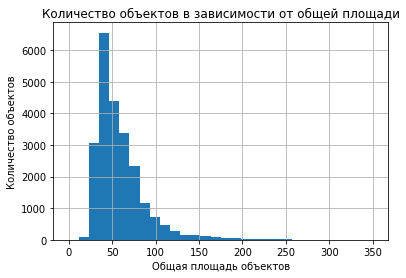

In [41]:
# построим гистограмму общей площади объектов total_area, подобрав число корзин (bins) и оптимальную область просмотра (range)
data['total_area'].hist(range = (0, 350), bins=30)
plt.title("Количество объектов в зависимости от общей площади")
plt.xlabel("Общая площадь объектов")
plt.ylabel("Количество объектов")

# выведем 10 наиболее часто встречаемых вариантов общей площади объектов total_area
data['total_area'].value_counts().head(10)

ТОП-10 вариантов общей площади объекта находится в пределах 3й-60 м2. Причем, пик приходится на объекты площадью 40-50 м2. Встречаются и более экзотические варианты - меньше 25 м2 (видимо, отдельные комнаты) или больше 200 м2 (частные дома), но их количество в пределах погрешности. Основная масса объектов - квартиры.

18.0    875
17.0    669
30.0    591
16.0    477
20.0    473
28.0    420
31.0    379
19.0    323
32.0    315
29.0    312
Name: living_area, dtype: int64

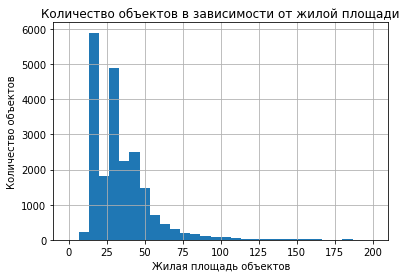

In [42]:
# построим гистограмму жилой площади объектов living_area, подобрав число корзин (bins) и оптимальную область просмотра (range)
data['living_area'].hist(range = (0, 200), bins=30)
plt.title("Количество объектов в зависимости от жилой площади")
plt.xlabel("Жилая площадь объектов")
plt.ylabel("Количество объектов")

# выведем 10 наиболее часто встречаемых вариантов жилой площади объектов living_area
data['living_area'].value_counts().head(10)

ТОП-10 вариантов жилой площади объекта находится в пределах 16-32 м2. Причем, пика на гистограмме 2: в районе 20 и в районе 30 м2. Встречаются и более экзотические варианты - меньше 15 м2 (видимо, отдельные комнаты) или больше 100 м2 (частные дома), но их количество в пределах погрешности. Основная масса объектов - квартиры.

6.0     1291
10.0    1252
8.0     1102
9.0     1091
7.0     1058
11.0     790
12.0     652
8.5      414
5.5      395
14.0     380
Name: kitchen_area, dtype: int64

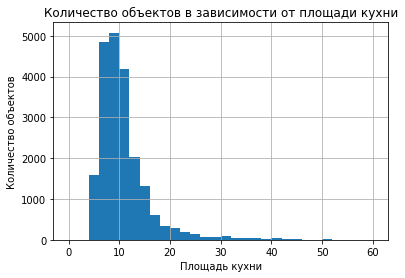

In [43]:
# построим гистограмму площади кухни kitchen_area, подобрав число корзин (bins) и оптимальную область просмотра (range)
data['kitchen_area'].hist(range = (0, 60), bins=30)
plt.title("Количество объектов в зависимости от площади кухни")
plt.xlabel("Площадь кухни")
plt.ylabel("Количество объектов")

# выведем 10 наиболее часто встречаемых вариантов площади кухни kitchen_area
data['kitchen_area'].value_counts().head(10)

ТОП-10 вариантов площади кухни объекта находится в пределах 6-15 м2. Причем, пик приходится на кухни площадью 6-12 м2. Встречаются и более экзотические варианты - больше 30 м2 (видимо, это кухни-гостиные в частных домах), но их количество в пределах погрешности. Основная масса объектов - квартиры.

4500000.0    340
3500000.0    288
4300000.0    257
4000000.0    257
4200000.0    256
3600000.0    253
3800000.0    239
3300000.0    238
3200000.0    237
3700000.0    228
Name: last_price, dtype: int64

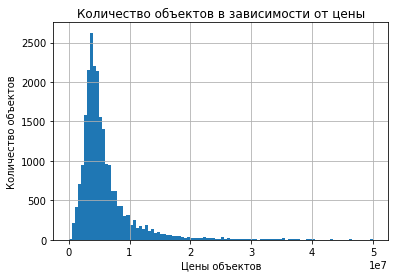

In [44]:
# построим гистограмму цен объектов last_price, подобрав число корзин (bins) и оптимальную область просмотра (range)
data['last_price'].hist(range = (0, 50000000), bins=100)
plt.title("Количество объектов в зависимости от цены")
plt.xlabel("Цены объектов")
plt.ylabel("Количество объектов")

# выведем 10 наиболее часто встречаемых вариантов цен объектов last_price
data['last_price'].value_counts().head(10)

ТОП-10 вариантов цен объекта находится в пределах 3,8-5,5 млн руб. Причем, пик приходится на объекты ценой 4-4,5 млн руб. Встречаются и более экзотические варианты - дороже 20 млн руб (видимо, это частные дома), но их количество в пределах погрешности. Основная масса объектов, судя по стоимости - квартиры.

1    7910
2    7804
3    5715
4    1149
5     306
0     190
6      94
7      50
8      10
9       8
Name: rooms, dtype: int64

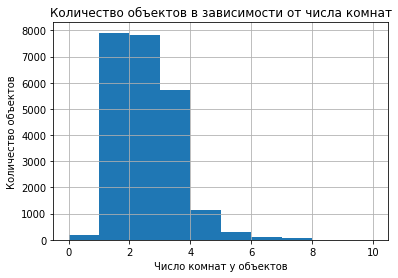

In [45]:
# построим гистограмму количества комнат у объектов rooms, подобрав число корзин (bins) и оптимальную область просмотра (range)
data['rooms'].hist(range = (0, 10), bins=10)
plt.title("Количество объектов в зависимости от числа комнат")
plt.xlabel("Число комнат у объектов")
plt.ylabel("Количество объектов")

# выведем 10 наиболее часто встречаемых вариантов количества комнат у объектов rooms
data['rooms'].value_counts().head(10)

ТОП-10 вариантов количества комнат у объекта находится в пределах 0-9 штук, что логично. Причем, пик приходится на объекты с 1-3 комнатами. Встречаются и более экзотические варианты - больше 6 комнат (видимо, это частные дома), но их количество в пределах погрешности. Основная масса объектов, судя по числу комнат - квартиры. Интересно, что есть 115 объектов, у которых 0 комнат. Ранее я писал, что, судя по всему, это не полноценные квартиры, а отдельные комнаты, т.е. с точки зрения логики не квартира как бы. Либо это однушки, когда незаполненное поле с числом комнтат означает их минимально возможное число - 1. В любом случае, по сравнению с общей выборкой их немного, поэтому они не оказывают серьезного влияния на точность расчетов.

2.50    3480
2.60    1638
2.70    1563
3.00    1092
2.80     982
2.55     975
2.75     900
2.65     673
3.20     272
3.10     201
Name: ceiling_height, dtype: int64

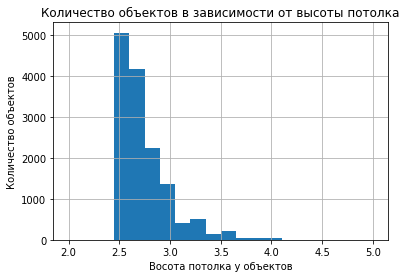

In [46]:
# построим гистограмму высот потолков у объектов ceiling_height, подобрав число корзин (bins) и оптимальную область просмотра (range)
data['ceiling_height'].hist(range = (2, 5), bins=20)
plt.title("Количество объектов в зависимости от высоты потолка")
plt.xlabel("Восота потолка у объектов")
plt.ylabel("Количество объектов")

# выведем 10 наиболее часто встречаемых вариантов высот потолков у объектов ceiling_height
data['ceiling_height'].value_counts().head(10)

ТОП-10 вариантов высоты потолков у объектов находится в пределах 2,5-3,2 метра. Причем, пик приходится на объекты с высотой потолка 2,5, также много обеъктов с высотой потолка 2,65 м. Встречаются и более экзотические варианты - больше 3,2 м, но их количество в пределах погрешности.

2     3293
3     3015
1     2867
4     2752
5     2574
6     1276
7     1192
8     1063
9     1038
10     677
Name: floor, dtype: int64

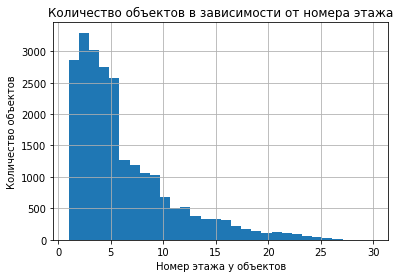

In [47]:
# построим гистограмму номеров этажей у квартир floor, подобрав число корзин (bins) и оптимальную область просмотра (range)
data['floor'].hist(range = (1, 30), bins=30)
plt.title("Количество объектов в зависимости от номера этажа")
plt.xlabel("Номер этажа у объектов")
plt.ylabel("Количество объектов")

# выведем 10 наиболее часто встречаемых вариантов номеров этажей у квартир floor
data['floor'].value_counts().head(10)

ТОП-10 вариантов номеров этажей у квартиры находится в пределах 1-5. Причем, как такового пика здесь нет (2-4 этажи чуть чаще встречаются). Далее по популярности идут варианты с 6 по 9 этажи: в этом случае с каждым этажом число квартир снижается. Далее идет группа 10-12 этажей (также со снижением при возрастании этажа), потом группа 13-17 этажей (с той же закономерностью). Далее с 18 по 25 этаж вариантов становится немного, а после 25 этажа ничтожно мало. Распределение логичное, поскольку в СПб много 5 и 9 этажных домов, при этом этажи с 1 по 5 есть в обоих объектах этих типов. Далее идут новостройки из так называемых "человейников", а высоток (25+ этажей) в Питере практически нет.

другой       17130
последний     3248
первый        2867
Name: floor_type, dtype: int64

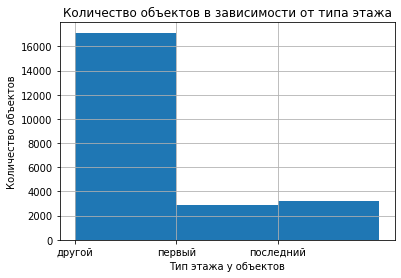

In [48]:
# построим гистограмму по типам этажей у квартир floor_type, подобрав число корзин (bins) и оптимальную область просмотра (range)
data['floor_type'].hist(range = (0, 3), bins=3)
plt.title("Количество объектов в зависимости от типа этажа")
plt.xlabel("Тип этажа у объектов")
plt.ylabel("Количество объектов")

# выведем наиболее часто встречаемые варианты номеров типов этажей у квартир floor_type (понятно, что их всего 3)
data['floor_type'].value_counts().head()

Здесь все логично: квартир на первых и последних этажах примерно одинаковое число (в любом доме есть первый и последний этаж), а других этажей заметно больше, т.к. среди объектов есть 9, 12, 17 и 20+ этажные дома.
    

5     5678
9     3730
16    1369
12    1355
10    1168
4     1167
25    1067
6      877
17     830
3      645
Name: floors_total, dtype: int64

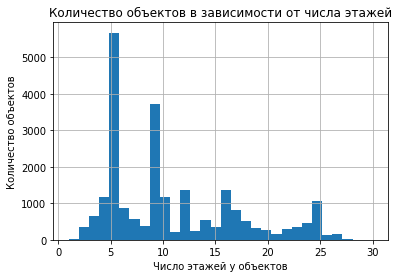

In [49]:
# построим гистограмму с общим количество этажей в домах, где продаются квартиры floors_total, подобрав число корзин (bins) и оптимальную область просмотра (range)
data['floors_total'].hist(range = (1, 30), bins=30)
plt.title("Количество объектов в зависимости от числа этажей")
plt.xlabel("Число этажей у объектов")
plt.ylabel("Количество объектов")

# выведем 10 наиболее часто встречаемых вариантов общего количества этажей в домах, где продаются квартиры floors_total
data['floors_total'].value_counts().head(10)

ТОП-10 вариантов числа этажей домов, где продаются квартиры, находится в пределах 4-25. 2 основых пика приходятся на 5 и 9 этажные дома, как самые массовые в СПб. Также заметные пики расположены у цифр 4, 6, 7, 12, 16 и 25 этажей. Это также популярные серии домов в Питере с точки зрения числа этажей в них. 1-2 этажных, а также 25+ этажных домов в СПб, судя по диаграмме, практически нет.

8460.0     61
20802.0    31
10720.0    30
8434.0     27
8370.0     26
10364.0    26
4836.0     25
20444.0    25
13845.0    23
4844.0     22
Name: cityCenters_nearest, dtype: int64

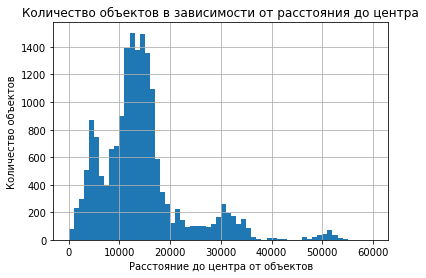

In [50]:
# построим гистограмму с расстоянием от объекта до центра города в метрах cityCenters_nearest, подобрав число корзин (bins) и оптимальную область просмотра (range)
data['cityCenters_nearest'].hist(range = (0, 60000), bins=60)
plt.title("Количество объектов в зависимости от расстояния до центра")
plt.xlabel("Расстояние до центра от объектов")
plt.ylabel("Количество объектов")

# выведем 10 наиболее часто встречаемых вариантов расстояний от объекта до центра города в метрах cityCenters_nearest
data['cityCenters_nearest'].value_counts().head(10)

ТОП-10 вариантов расстояний от объектов, где продаются квартиры, до центра города находится в пределах 4800-20800 метров. Основной пик приходится на 11-17 км от центра города, есть еще заметный пик в районе 4-7 км от центра города. Скорее всего, речь про старые районы города (второй пик) и про районы города, отстроенные после войны (сам в таком живу, поэтому знаю расстояние отсюда до центра СПб).

37434.0    61
21928.0    32
39946.0    30
44870.0    29
37407.0    27
39140.0    26
18732.0    25
31744.0    25
37412.0    24
19499.0    23
Name: airports_nearest, dtype: int64

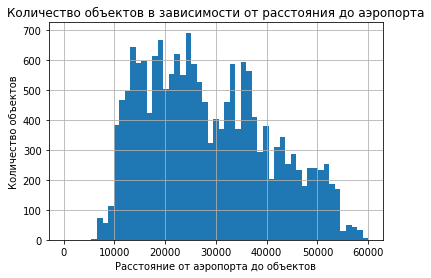

In [51]:
# построим гистограмму с расстоянием от объекта до ближайшего аэропорта airports_nearest, подобрав число корзин (bins) и оптимальную область просмотра (range)
data['airports_nearest'].hist(range = (5, 60000), bins=55)
plt.title("Количество объектов в зависимости от расстояния до аэропорта")
plt.xlabel("Расстояние от аэропорта до объектов")
plt.ylabel("Количество объектов")

# выведем 10 наиболее часто встречаемых вариантов расстояний от объекта до ближайшего аэропорта airports_nearest
data['airports_nearest'].value_counts().head(10)

ТОП-10 вариантов расстояний от объектов, где продаются квартиры, до ближайшего аэропорта находится в пределах 18700-44900 метров. Как таковых пиков нет: есть область с наибольшим числом объектов - с 11 до 28 км от аэропорта. Также заметной областью выглядит диапазон объектов в районе 33-38 км. Далее по мере удаления от аэропорта встречается все меньше объектов с продающими квартирами, что логично, т.к. судя по всему, расстояние от самого дальнего района города в районе 55 км, после чего город заканчивается, и число объектов резко снижается. Ближе 5 км от аэропорта объектов также почти нет (наш аэропорт расположен на удалении от города), в зоне 5-10 км объекты есть, но их число сопоставимо с объектами в 55-60 км от аэропорта, т.к. в обоих случаях речь идет о частном секторе.

441.0     67
392.0     41
173.0     40
456.0     40
471.0     31
2102.0    30
541.0     29
458.0     28
447.0     28
288.0     27
Name: parks_nearest, dtype: int64

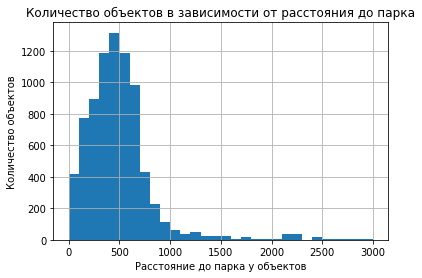

In [52]:
# построим гистограмму с расстоянием от объекта до ближайшего парка parks_nearest, подобрав число корзин (bins) и оптимальную область просмотра (range)
data['parks_nearest'].hist(range = (0, 3000), bins=30)
plt.title("Количество объектов в зависимости от расстояния до парка")
plt.xlabel("Расстояние до парка у объектов")
plt.ylabel("Количество объектов")

# выведем 10 наиболее часто встречаемых вариантов расстояний от объекта до ближайшего парка parks_nearest
data['parks_nearest'].value_counts().head(10)

ТОП-10 вариантов расстояний от объектов, где продаются квартиры, до ближайшего парка находится в пределах 170-2100 метров. Пик приходится на 250-700 метров. Львиная доля объектов попадает в зону в радиусе 1 км от парка. Это правда, у нас очень зеленый город.

3    4216
1    4104
4    3935
2    3892
0    3543
5    1896
6    1659
Name: weekday, dtype: int64

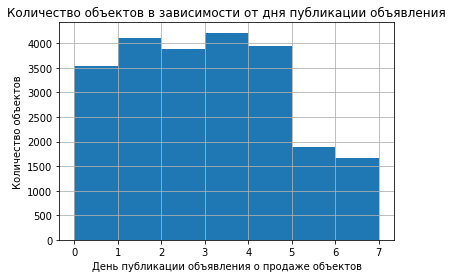

In [53]:
# построим гистограмму с днями публикации объявлений weekday, подобрав число корзин (bins) и оптимальную область просмотра (range)
data['weekday'].hist(range = (0, 7), bins=7)
plt.title("Количество объектов в зависимости от дня публикации объявления")
plt.xlabel("День публикации объявления о продаже объектов")
plt.ylabel("Количество объектов")

# выведем 7 наиболее часто встречаемых вариантов дней публикации объявлений (т.к. дней в неделе 7 штук)
data['weekday'].value_counts().head(7)

Самые популярные дни для публикации объявлений - со вторника по пятницу. Чуть реже объявления публикуются в понедельник (видимо, в понедельник больше заняты работой и другими делами), реже всего публикуются объявления в выходные (видимо, в эти дни люди в основном отдыхают).

2     2598
3     2534
11    2330
4     2325
10    2083
9     1950
6     1731
8     1713
7     1657
12    1613
1     1466
5     1245
Name: month, dtype: int64

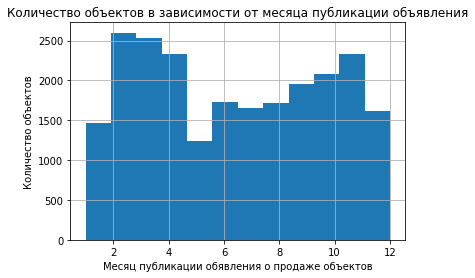

In [54]:
# построим гистограмму с месяцами публикации объявлений month, подобрав число корзин (bins) и оптимальную область просмотра (range)
data['month'].hist(range = (1, 12), bins=12)
plt.title("Количество объектов в зависимости от месяца публикации объявления")
plt.xlabel("Месяц публикации обявления о продаже объектов")
plt.ylabel("Количество объектов")

# выведем 12 наиболее часто встречаемых вариантов месяцев публикации объявлений (т.к. месяцев в году 12 штук)
data['month'].value_counts().head(12)

Здесь видна следующая закономерность в зависимости от сезона или месяца:
- февраль, март и апрель - лидеры по числу опубликованных объявлений; с каждым месяцем объявлений чуть меньше, чем в прошлом месяце
- сентябрь, октябрь и ноябрь - второе место среди лидеров публикации по этому параметру; с каждым месяцем объявлений публикуется чуть больше, чем в прошлом месяце
- июнь, июль и август - средний объем публикаций объявлений; прослеживается стабильность по числу публикаций каждый месяц
- январь, май и декабрь - минимумы, связанные с праздниками, отпусками и нежеланием перед НГ затевать переезд

0     3125
45     870
60     534
7      230
30     205
90     198
4      172
3      157
5      151
14     142
Name: days_exposition, dtype: int64

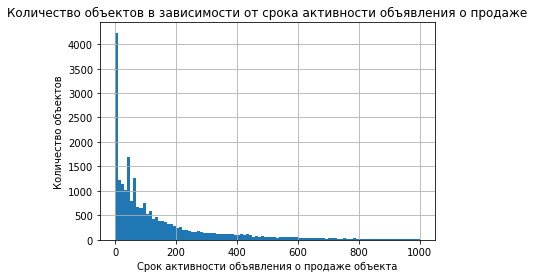

In [55]:
# изучим данные из столбца days_exposition, чтобы понять, как быстро продавались квартиры
# построим гистограмму с данными столбца days_exposition, подобрав число корзин (bins) и оптимальную область просмотра (range)
data['days_exposition'].hist(range = (0, 1000), bins=100)
plt.title("Количество объектов в зависимости от срока активности объявления о продаже")
plt.xlabel("Срок активности объявления о продаже объекта")
plt.ylabel("Количество объектов")

# выведем 10 наиболее часто встречаемых вариантов из столбца days_exposition, чтобы увидеть число активных объявлений
data['days_exposition'].value_counts().head(10)

Гистограмма позволяет увидеть соотношение общего числа объявлений к тем, которые до сих пор активны (пропуски в графе days_exposition для еще непроданных квартир ранее специально заменили на 0). Из данных, полученных при помощи data['days_exposition'].value_counts().head(10), следует, что 2276 объявлений активны до сих пор, это порядка 10% от общего числа объявлений. Теперь перейдем к детальному изучению уже закрытых объявлений. Основная масса продаж происходит в первые 60 дней после публикации объявления: это видно как из гистограммы, так и из data['days_exposition'].value_counts().head(10). Далее идет постепенное затухание числа продаж с разовым пиком на 90 дней. Продажи с 300 до 500 для выходят на плато, после чего число продаж стремится к нулю.

In [56]:
# найдем медиану и среднее значение дней до продажи объекта, отбросив активные объявления, чтобы их 0 не искажали расчет
data[data['days_exposition'] != 0]['days_exposition'].describe()

count    20120.000000
mean       180.354274
std        219.409173
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

Медиана по времени продажи = 95 дней
Среднее время продажи = 182 дня

Выводы по оценке данных days_exposition:
1. 10% объявлений остаются активными
2. Основные продажи происходят в первые 60 дней после публикации объявления, также заметное число продаж происходит с 61 по 90 день. Далее идет равномерное и постепенное снижение числа сделок, вплоть до величины около нуля после 500 дня
3. Медиана по времени продажи = 95 дней; среднее время продажи = 182 дня.
4. Считаю быстрыми продажи, произошедшие в первые 60 дней. Все-таки продажа квартиры - серьезный процесс. Долгие продажи - от 182 дней и выше, т.е. больше среднего времени. Считаю, что продажа жилья в срок больше 6 месяцев - необычно долго.

Теперь давайте оценим зависимость цены объекта от различных его характеристик:

Text(0, 0.5, 'Стоимость объектов')

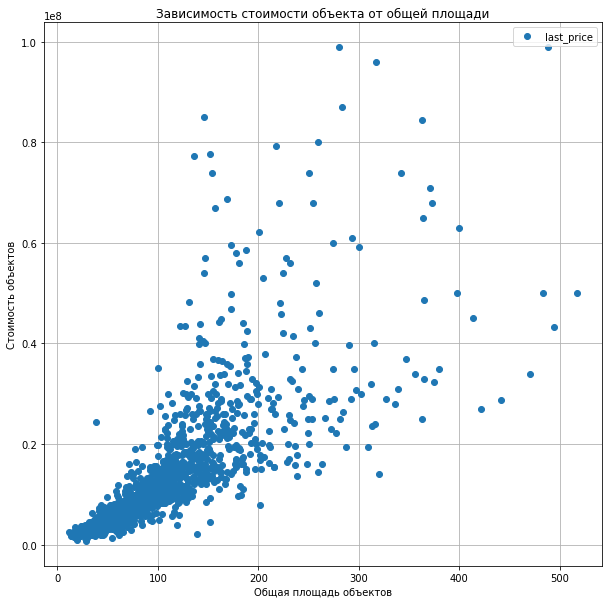

In [57]:
# оценим зависимость стоимости объекта от общей площади
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(10, 10))
plt.title("Зависимость стоимости объекта от общей площади")
plt.xlabel("Общая площадь объектов")
plt.ylabel("Стоимость объектов")

С увеличением общей площади стоимость объекта растет. Это видно даже на аномальных значениях, не говоря уже об основной их массе.

In [58]:
# посчитаем коэффициент корреляции Пирсона для двух этих величин
data['total_area'].corr(data['last_price'])

0.7614594736511466

Корреляция получается достаточно сильной, но не максимальной, т.к. меньше 1.

Text(0, 0.5, 'Стоимость объектов')

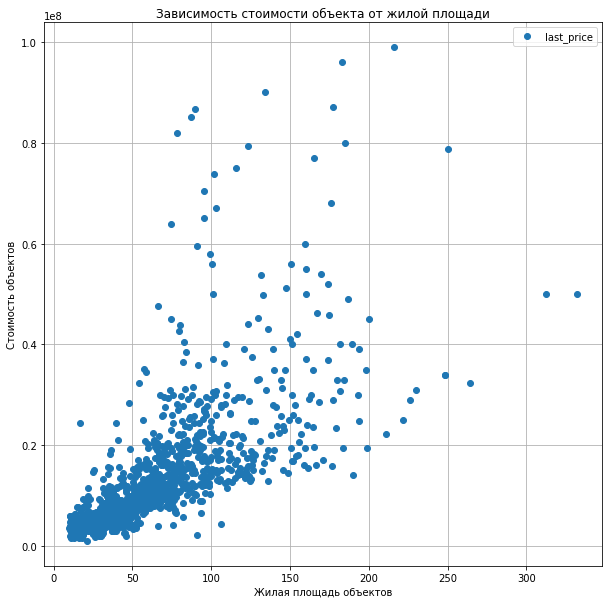

In [59]:
# оценим зависимость стоимости объекта от жилой площади
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(10, 10))
plt.title("Зависимость стоимости объекта от жилой площади")
plt.xlabel("Жилая площадь объектов")
plt.ylabel("Стоимость объектов")

С увеличением жилой площади стоимость объекта растет. Это видно как на аномальных значениях, так и на значениях из основной массы.

In [60]:
# посчитаем коэффициент корреляции Пирсона для двух этих величин
data['living_area'].corr(data['last_price'])

0.6796099499961901

Здесь корреляция также заметная, но меньше, чем в предыдущем примере

Text(0, 0.5, 'Стоимость объектов')

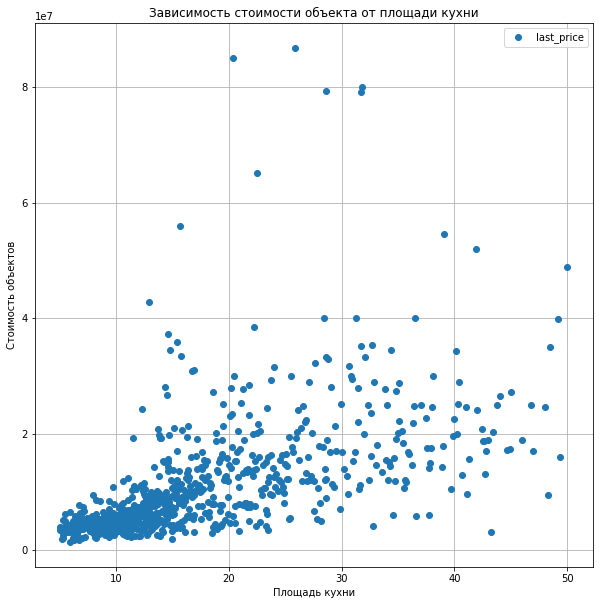

In [61]:
# оценим зависимость стоимости объекта от площади кухни
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(10, 10))
plt.title("Зависимость стоимости объекта от площади кухни")
plt.xlabel("Площадь кухни")
plt.ylabel("Стоимость объектов")

Здесь зависимость тоже есть, но намного более плавная: с ростом размера кухни стоимость растет, но не всегда и не так сильно. Все-таки площадь кухни для многих второстепенный параметр, больше интересует общая и жилая площадь объекта, о чем говорят 2 графика выше.

In [62]:
# посчитаем коэффициент корреляции Пирсона для двух этих величин
data['kitchen_area'].corr(data['last_price'])

0.5673386046757328

Здесь коэффициент корреляции самый маленький, что подтверждает данные из диаграммы выше.

Text(0, 0.5, 'Стоимость объектов')

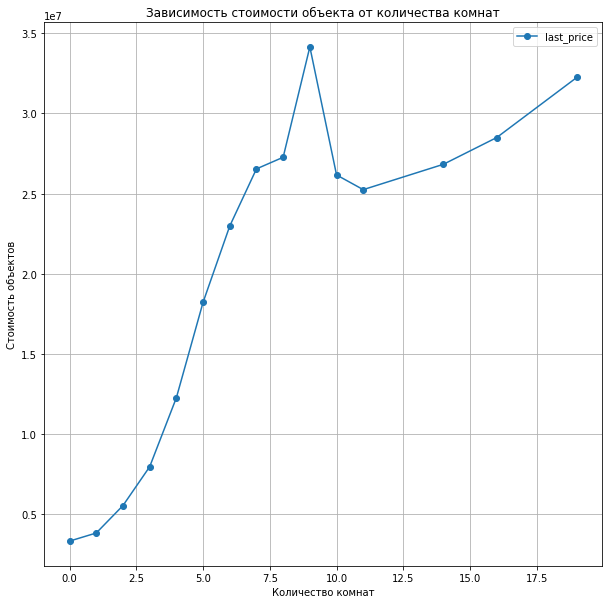

In [63]:
# оценим зависимость стоимости объекта от количества комнат
data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(10, 10))
plt.title("Зависимость стоимости объекта от количества комнат")
plt.xlabel("Количество комнат")
plt.ylabel("Стоимость объектов")

Зависимость стоимости объекта от числа комнат очень заметная и прямо пропорциональная вплоть до 7 комнат: каждая комната прибавляет 200-500 тыс. рублей к стоимости жилья. Далее на графике от 8 до 11 комнат есть даже небольшой спад стоимости, в пределах 250 тыс. рублей. Судя по всему, в этом случае большее влияние оказывают другие параметры жилья из выборки, которые несколько снижают его стоимость. Начиная с 11 по 19 комнат снова идет рост стоимости жилья, но не такой резкий. На графике есть аномалия в районе 9 комнат, но она сильно выбивается из общей логики графика, поэтому ее подробно не рассматриваем.

Text(0, 0.5, 'Стоимость объектов')

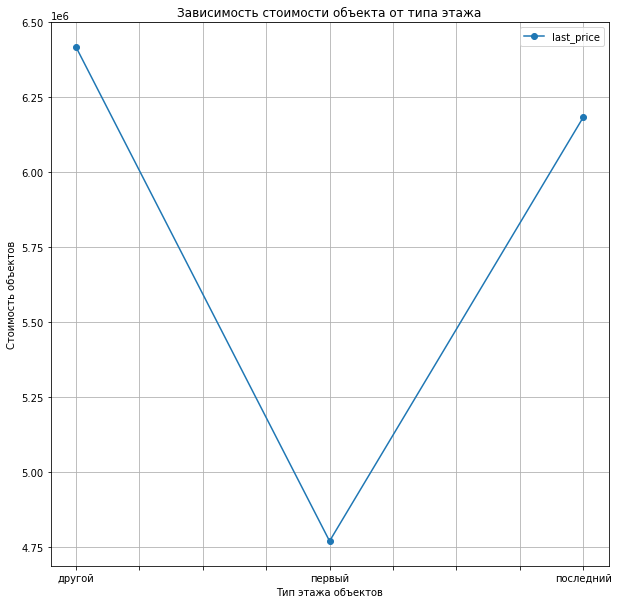

In [64]:
# оценим зависимость стоимости объеката от типа этажа
data.pivot_table(index='floor_type', values='last_price').plot(grid=True, style='o-', figsize=(10, 10))
plt.title("Зависимость стоимости объекта от типа этажа")
plt.xlabel("Тип этажа объектов")
plt.ylabel("Стоимость объектов")

Самые дешевые квартиры расположены на 1 этаже, самые дорогие в нашей выборке - на последнем. Квартиры с других этажей стоят в среднем на 500 тыс. руб. дешевле квартир на последнем этаже.

Text(0, 0.5, 'Стоимость объектов')

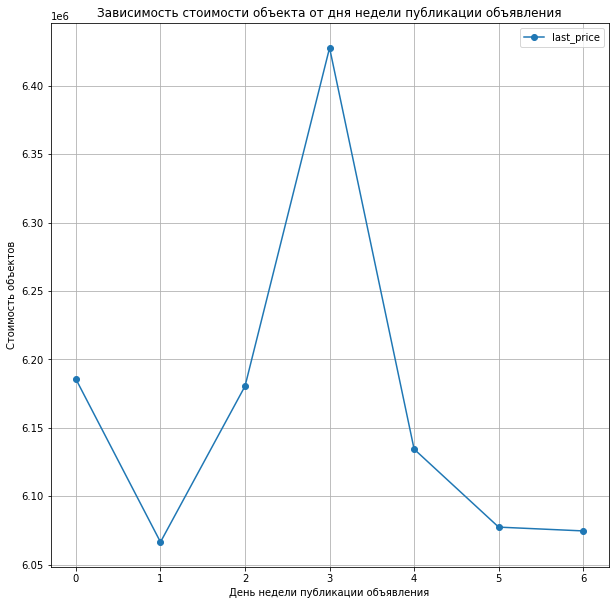

In [65]:
# оценим зависимость стоимости объеката от дня недели публикации объявления
data.pivot_table(index='weekday', values='last_price').plot(grid=True, style='o-', figsize=(10, 10))
plt.title("Зависимость стоимости объекта от дня недели публикации объявления")
plt.xlabel("День недели публикации объявления")
plt.ylabel("Стоимость объектов")

Разброс цен в зависимости от дня недели составляет 450 тыс. руб. Самые недорогие объекты из выборки опубликованы во вторник, самые дорогие - в четверг. В остальные дни стоимость на 50-100 тыс. руб. дороже, чем во вторник.

Text(0, 0.5, 'Стоимость объектов')

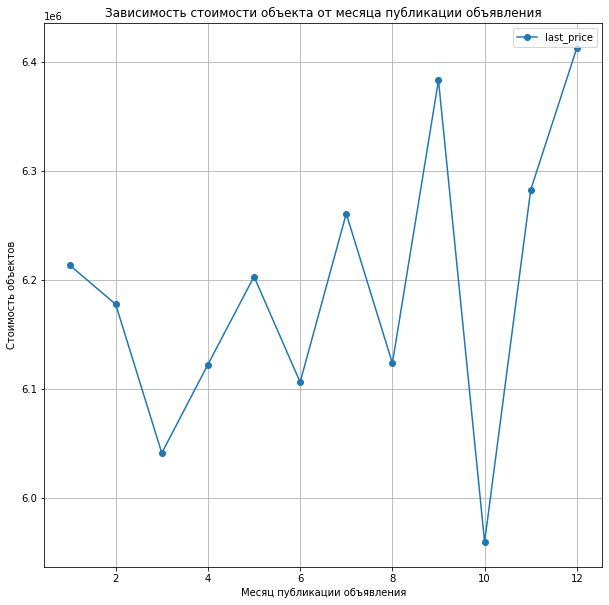

In [66]:
# оценим зависимость стоимости объеката от месяца публикации объявления
data.pivot_table(index='month', values='last_price').plot(grid=True, style='o-', figsize=(10, 10))
plt.title("Зависимость стоимости объекта от месяца публикации объявления")
plt.xlabel("Месяц публикации объявления")
plt.ylabel("Стоимость объектов")

Разброс цен в зависимости от месяца публикации составляет 800 тыс. руб. Самые недорогие объекты из выборки опубликованы в октябре, самые дорогие - в декабре. Есть пики по ценам в январе, июле и сентябре.

Text(0, 0.5, 'Стоимость объектов')

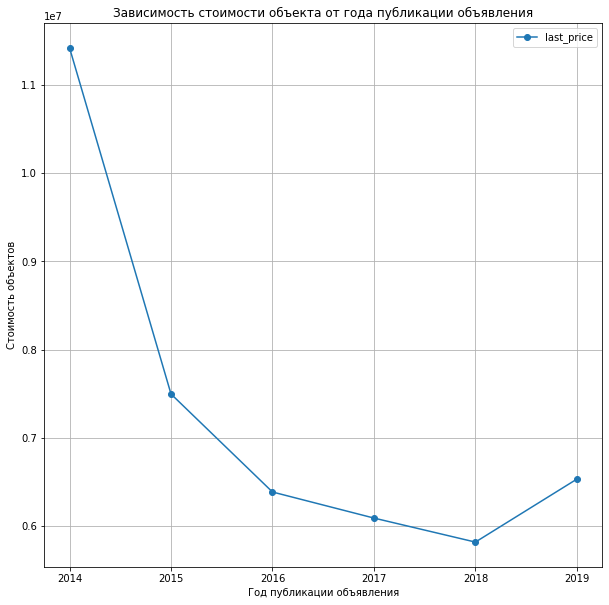

In [67]:
# оценим зависимость стоимости объеката от года публикации объявления
data.pivot_table(index='year', values='last_price').plot(grid=True, style='o-', figsize=(10, 10))
plt.title("Зависимость стоимости объекта от года публикации объявления")
plt.xlabel("Год публикации объявления")
plt.ylabel("Стоимость объектов")

Разброс цен в зависимости от года публикации составляет 600 тыс. руб. Самые недорогие объекты из выборки опубликованы в 2014 году, далее - резкий спад стоимости на 350 тыс.руб. в 2015 году, еще на 100 тыс. руб. в 2016 году на 50 тыс. руб. в 2017 году и еще немного в 2018 году. В 2019 году пошло восстановление цен - прибавка стоимости составила около 50 т.р. Судя по всему, причина в кризисе 2014 года и последующем падении доходов населения на протяжении нескольких лет, что вынуждало прродавцов снижать стоимость жилья для его продажи.

Выводы по оценке зависимости цены от разных параметров продаваемого объекта:

- Общая площадь. С ростом общей площади объекта возрастает его стоимость - зависимость прямая.
- Жилая площадь. С ростом жилой площади объекта возрастает его стоимость - зависимость прямая.
- Площадь кухни. С ростом площади кухни почти не возрастает его стоимость - зависимость слабая.
- Количество комнат. С ростом числа комнат с 1 до 7 возрастает стоимость объекта. Между 8 и 14 комнатами особой разницы в цене нет. С 14 по 19 снова наблюдается возрастание стоимости жилья, но не такое сильное, как в случае с участком 1 - 7 комнат.
- Этаж. Самые дешевые квартиры расположены на 1 этаже, самые дорогие в нашей выборке - на последнем. Квартиры с других этажей стоят в среднем на 500 тыс. руб. дешевле квартир на последнем этаже.
- День недели публикации объявления. Самые недорогие объекты из выборки опубликованы во вторник, самые дорогие - в четверг. В остальные дни стоимость на 50-100 тыс. руб. дороже, чем во вторник.
- Месяц публикации объявления. Самые недорогие объекты из выборки опубликованы в октябре, самые дорогие - в декабре. Есть пики по ценам в январе, июле и сентябре. Скорее всего, в январе и декабре люди готовы к продаже жилья только по завышенным ценам.
- Год публикации объявления. Самые недорогие объекты из выборки опубликованы в 2014 году, далее - резкий спад стоимости на 350 тыс.руб. в 2015 году, еще на 100 тыс. руб. в 2016 году на 50 тыс. руб. в 2017 году и еще немного в 2018 году. В 2019 году пошло восстановление цен - прибавка стоимости составила около 50 т.р. Судя по всему, причина в кризисе 2014 года и последующем падении доходов населения на протяжении нескольких лет, что вынуждало продавцов снижать стоимость жилья для его продажи.

Далее проанализируем данные по стоимости 1 м2 жилья в зависимости от некоторых параметров.

In [68]:
# выведем 10 населенных пунктов из выборки, которые чаще всего встречаются в объявлениях
city_top = data['locality_name'].value_counts().head(10)
# создадим сводную таблицу с ценами на жилье в 10 самых распространенных населенных пунктах датафрейма
city_top_price = data.query('locality_name in (@city_top.index)').pivot_table(values='metr_price', index='locality_name')
# поменяем тип данных в сводной таюлице на int
city_top_price = city_top_price.astype(int)
# отсортируем данные для анализа
city_top_price.sort_values('metr_price', ascending=False)

,metr_price
locality_name,
санкт-петербург,113192
пушкин,102912
кудрово,95261
парголово,90175
мурино,85893
шушары,78538
колпино,75443
гатчина,68858
всеволожск,68669


Среди ТОП-10 наиболее часто указанных в объявлениях населенных пунктах сороже всего 1 м2 жилья в Санкт-Петербурге, самое недорогое - в Выборге, как наиболее удаленном от СПб крупной населенном пункте ЛО.

Text(0, 0.5, 'Стоимость объектов')

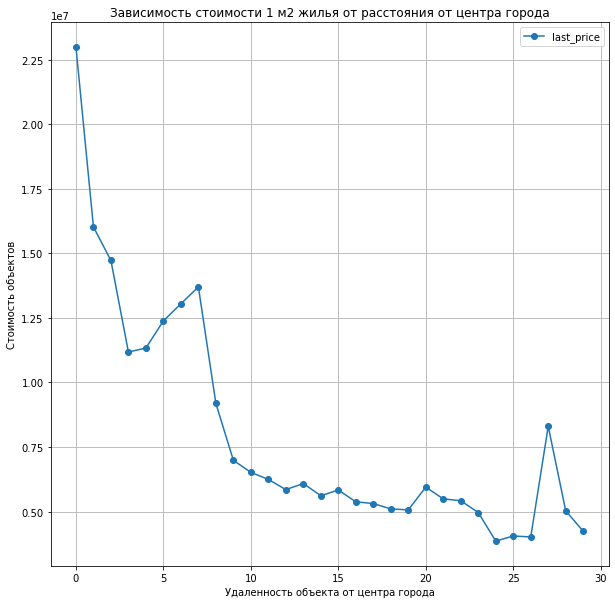

In [69]:
# создадим датафрейм с объявленими только по СПб
data = data[data['locality_name'] == 'санкт-петербург']

# построим график зависимости стоимости 1 м2 жилья от расстояния от центра города
data.pivot_table(index='cityCenters_nearest_km', values='last_price').plot(grid=True, style='o-', figsize=(10, 10))
plt.title("Зависимость стоимости 1 м2 жилья от расстояния от центра города")
plt.xlabel("Удаленность объекта от центра города")
plt.ylabel("Стоимость объектов")

Судя по графику, самое дорогое жилье - в центре СПб. Далее по мере удаления от центра стоимость 1 м2 жилья снижается, причем довольно резко на таких отрезках: 0-3 км и 7-9 км. В районе 4-7 км наоборот виден локальный пик стоимости 1 м2 жилья, видимо, здесь за рост стоимости квартир оказывают положительное влияние другие их параметры. На отрезке с 9 до 26 идет плавное снижение стоимости жилья с локальным пиком стоимости в районе 27 км. Видимо, на таком удалении расположены таунхаусы.

### Общий вывод

Выводы по результатам исследования

Задача проекта – научиться определять рыночную стоимость объектов недвижимости. Исходные данные - архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

1. Этап изучения общей информации о датафрейме
Импортировали датайфрейм, открыли первые 5 строк, общие данные и построили гистограммы для всех числовых столбцов таблицы.
В результате стало понятно следующее:
А) объем таблицы (число строк и столбцов);
Б) названия столбцов, типы данных в них, перечень столбцов, где тип данных нужно будет менять;
В) наличие и число пропусков в данных по разным столбцам;
Г) гистограммы дали первую информацию по диапазонам и пикам данных в числовых столбцах.

2. Этап предобработки данных

А) Работа с пропусками
На этом этапе сделали следующее:
- оценили число пропусков по каждой колонке;
- удалили пропуски в двух колонках - floors_total и locality_name, т.к. их было очень мало, а восстановить их было нельзя;
- выделили для колонки с пропусками, где их можно было восстановить;
- в зависимости от логики данных в каждом таком столбце различными методами (медианным значением, заменой пропуска на 0 и т.д.) заполнили пропуски.

В итоге с пропусками оставили такие графы датафрейма, т.к. восстановить в них достоверные данные невозможно:
- airports_nearest
- cityCenters_nearest
- parks_nearest
- ponds_nearest
- ceiling_height
- living_area
- kitchen_area

Были сделаны выводы по причине возникновения пропусков. В случае с перечисленными выше 4-мя колонками – это необязательность заполнения таких данных при публикации объявлений. В остальных случаях это либо человеческий фактор (например, нет балкона в квартире, 0 не ставится, а просто пропускается параметр при заполнении), либо специфика данных (когда в графе days_exposition стоит пропуск, если объявление еще активно).

Б) Работа с типами данных
На этом этапе заменили в некоторых колонках тип данных на другой, чтобы в дальнейшем можно было проводить с ними необходимые вычисления и другие нужные для анализа операции.

В) Работа с аномалиями в данных
Вывели общую информацию (методом .describe()) о скорректированном на предыдущих этапах датафрейме и оценили наличие аномалий в min и max значениях по каждому столбцу таблицы. Путем логических рассуждений выделили графы с аномалиями (например, с высотами потолков в 1 или в 100 м; жилой площадью в 2 м2 и т.д.). Далее оценили величины аномалий (скажем, после какой величины можно считать высоту потолка аномально большой) и в случае с небольшим числом аномалий (до 100 случаев той или иной аномалии) просто удалили их, как мало влияющие на выборку в 20000+ объявлений.

Г) Работа с неявными дублями по столбцу locality_name
Среди перечня населенных пунктов были дубли за счет чередования Ё и Е в названиях одних и тех же населенных пунктах, а также из-за использования разных регистров в написании. Привели их к общему виду (Ё заменили на Е, регистр везде сделали строчный, удалил типы населенных пунктов).

В результате исходный датафрейм был модифицирован под дальнейшее исследование без потери существенных данных. Выводы по анализу обновленного датафрейма будут представлять большую точность и ценность, что позволит выполнить поставленную задачу максимально качественно.

3. Этап расчета новых данных и их добавления в таблицу

Далее мы добавили такие параметры жилья в датафрейм:
- рассчитали стоимость квадратного метра жилья;
- выделили в отдельные столбцы данные о дне недели, месяце и годе публикации объявления;
- разделили жилье на 3 категории в зависимости от этажа, где оно расположено (первый, последний и другой);
- перевели расстояние от объекта до центра города из метров в километры с округлением до целого числа.

Эти данные понадобятся нам на следующем этапе работы с датафреймом.

4. Этап исследовательского анализа данных

После всех подготовительных этапов настало время для исследования.

А) Были построены гистограммы по следующим параметрам объектов:
- общей площади;
- жилой площади;
- площади кухни;
- цен;
- количества комнат;
- высот потолков;
- номеров этажей квартир;
- типам этажей (первый, последний и другой);
- общим числом этажей в доме;
- расстоянием от центра;
- расстоянием до аэропорта;
- расстоянием до парка;
- днем недели публикации объявления;
- месяцем публикации объявления;
- сроком, прошедшим со дня публикации объявления до его продажи.
Были сделаны выводы, какие величины параметров встречаются чаще всего в нашей выборке объявлений, а какие – в пределах погрешности около нуля. И почему могли получиться такие данные. В некоторых случаях выводы были логичны (например, что чаще всего продают квартиры с 1-3 комнатами), в некоторых были найдены достаточно интересные моменты (например, в выходные объявления о продаже жилья публикуются в среднем в 2 раза реже, чем по будням).

Б) Были построены графики зависимости следующих параметров жилья от стоимости:
- общая площадь;
- жилая площадь;
- площадь кухни;
- количество комнат;
- тип этажа (первый, последний и другой);
- день недели публикации объявления;
- месяц публикации объявления;
- год публикации объявления.
Были сделаны выводы, какие параметры оказывают непосредственное влияние на цену стоимости объекта, насколько сильно и почему. Среди оказывающих прямое влияние – общая и жилая площадь, число комнат (с 1 по 7 и с 11 по 19, при этом с 7 по 11 влияния нет), тип этажа (как ни странно, последний этаж оказался дороже квартир из категории «другие»). При этом год публикации объявления оказывал обратное влияние (с 2014 по 2018 цены падали, в 2019 подросли), что можно объяснить кризисом 2014 года. До построения графика я лично думал, что цены на жилье ежегодно растут.

В) Была создана сводная таблица стоимости 1 м2 жилья в ТОП-10 наиболее часто встреченных в объявлениях датафрейма населенных пунктах. Подтвердилось предположение, что самое дорогое жилье в СПб. Также стало понятно, в каких населенных пунктах ЛО из ТОП-10 жилье дешевле, и сколько оно в среднем стоит. Самые дешевые квартиры оказались в Выборге, как самом удаленном от СПб крупном населенном пункте.

Г) Был проведен анализ стоимости жилья в СПб в зависимости от его удаленности от центра города. Выяснилось, что помимо логичного снижения стоимости помимо удаления от центра есть локальные пики роста стоимости в районе 4-7 и 27 км. Без построения графика можно было подумать, что цена будет стабильно снижаться по мере удаления объекта от центра города.

В результате исследования данных удалось найти важные закономерности, влияющие на стоимость жилья в СПб и ЛО. Некоторые из них были на интуитивном уровне понятны еще до исследования, другие – стали полной неожиданностью. Благодаря анализу данных можно лучше анализировать ценообразование жилья в СПб и ЛО, что сделает работу сервиса Яндекс Недвижимость более качественной.